# U.S. Medical Insurance Costs

In [2]:
# Importing the required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as pp
import seaborn as sns

The average age is 39.21 years
The highest insurance cost is $63770.43
The lowest insurance cost is $1121.87
The average insurance cost is $13270.42
The median insurance cost is $9382.03
    index  sex
0    male  676
1  female  662


Text(0, 0.5, 'Number of people')

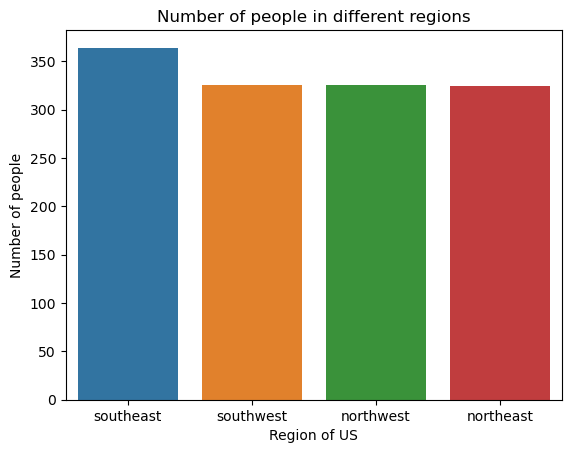

In [3]:
# Reading in the data from the csv file
imported_file = pd.read_csv('insurance.csv')

# Calculating the average age of the people in the dataset
average_age = imported_file.age.mean()

# Calculating average age by gender
average_age_gender = imported_file.groupby('sex').age.mean().reset_index()

# Printing various metrics
print('The average age is ' + str(round(average_age,2)) + ' years')
print('The highest insurance cost is $' + str(round(imported_file.charges.max(),2)))
print('The lowest insurance cost is $' + str(round(imported_file.charges.min(),2)))
print('The average insurance cost is $' + str(round(imported_file.charges.mean(),2)))
print('The median insurance cost is $' + str(round(imported_file.charges.median(),2)))

# Counting the number of people of each gender and printing it
count_gender = imported_file['sex'].value_counts().reset_index()
print(count_gender)

# Creating new variables used to order the columns in the bar chart below
counted_data = imported_file['region'].value_counts().reset_index()
counted_data.columns = ['Region', 'Count']
counted_data_sorted = counted_data.sort_values('Count', ascending=False)

# Creating a bar chart for number of people in different regions
sns.countplot(x='region', data=imported_file, order=counted_data_sorted['Region'])
pp.title('Number of people in different regions')
pp.xlabel('Region of US')
pp.ylabel('Number of people')

Text(0.5, 0, 'Insurance cost ($)')

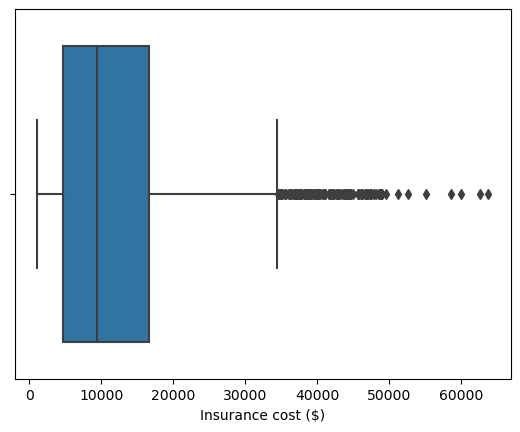

In [4]:
# Creating a box plot to see the spread in insurance costs
sns.boxplot(x='charges', data=imported_file)
pp.xlabel('Insurance cost ($)')

Text(0.5, 1.0, 'Average insurance cost between genders')

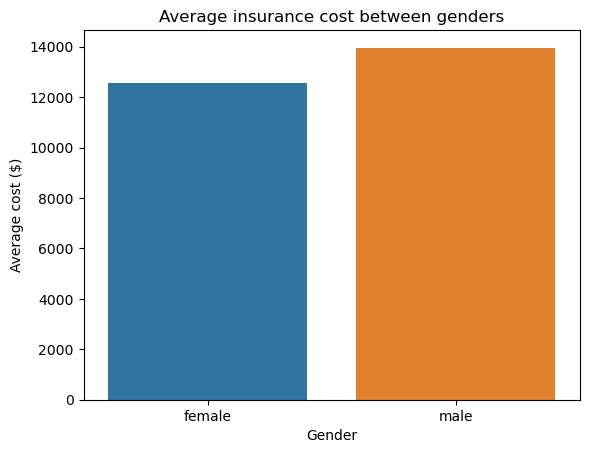

In [5]:
# Grouping by gender to calculate the average and median insurance cost for each gender
avg_charges_gender = imported_file.groupby('sex').charges.mean().reset_index()
median_charges_gender = imported_file.groupby('sex').charges.median().reset_index()

# Plotting a bar chart for the average insurance cost
sns.barplot(x='sex', y='charges', data=avg_charges_gender)
pp.ylabel('Average cost ($)')
pp.xlabel('Gender')
pp.title('Average insurance cost between genders')

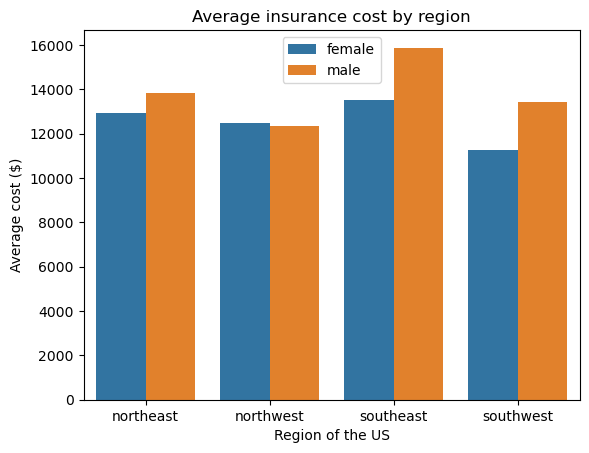

In [6]:
# Grouping by gender and region and calculating the average insurance cost
avg_charges_gender_region = imported_file.groupby(['sex', 'region']).charges.mean().reset_index()

# Plotting the bar chart for the regions split by gender
sns.barplot(x='region', y='charges', hue='sex', data=avg_charges_gender_region)
pp.title('Average insurance cost by region')
pp.ylabel('Average cost ($)')
pp.xlabel('Region of the US')
pp.legend(loc='upper center')

sex     smoker
female  no        547
        yes       115
male    no        517
        yes       159
dtype: int64


Text(0, 0.5, 'Average cost ($)')

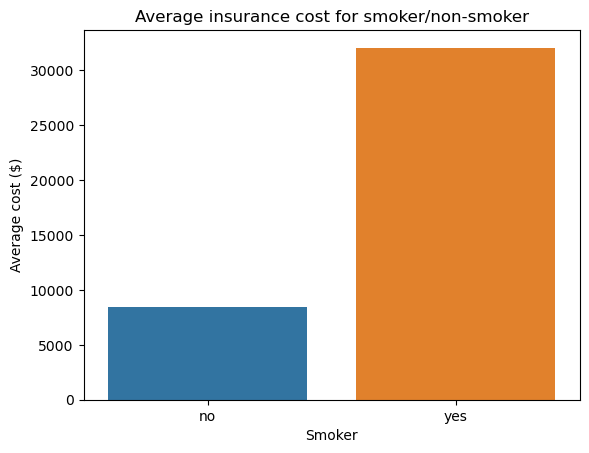

In [7]:
# Grouping by smoker status and calculating the average cost
avg_charges_smoker = imported_file.groupby('smoker').charges.mean().reset_index()

# Calculating the number of smokers by each gender and printing it out
num_smokers = imported_file.groupby(['sex', 'smoker']).size()
print(num_smokers)

# Creating a bar chart for insurance costs by smoker status
sns.barplot(x='smoker', y='charges', data=avg_charges_smoker)
pp.title('Average insurance cost for smoker/non-smoker')
pp.xlabel('Smoker')
pp.ylabel('Average cost ($)')

Text(0, 0.5, 'Average cost ($)')

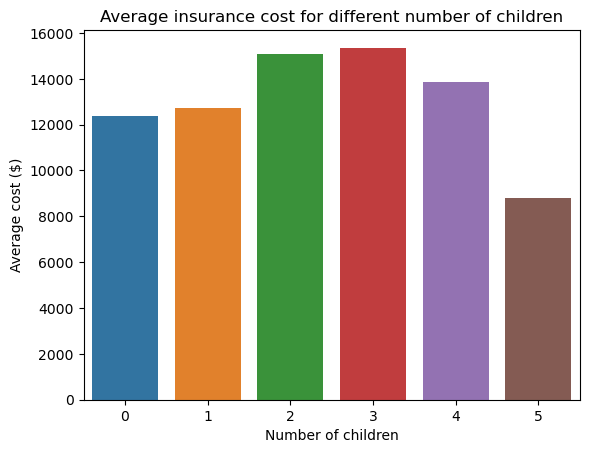

In [8]:
# Grouping by number of children and calculating the average costs
avg_charges_children = imported_file.groupby('children').charges.mean().reset_index()

# Plotting a bar chart for variation in costs by number of children
sns.barplot(x='children', y='charges', data=avg_charges_children)
pp.title('Average insurance cost for different number of children')
pp.xlabel('Number of children')
pp.ylabel('Average cost ($)')

Text(0, 0.5, 'Insurance cost ($)')

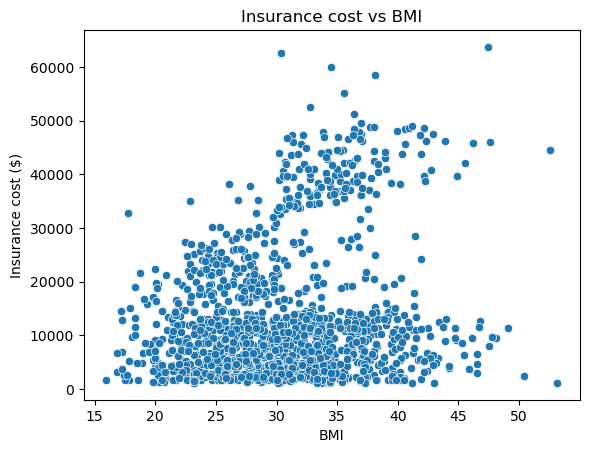

In [16]:
# Creating a scatterplot for Insurance cost vs BMI
sns.scatterplot(x='bmi', y='charges', data=imported_file)
pp.title('Insurance cost vs BMI')
pp.xlabel('BMI')
pp.ylabel('Insurance cost ($)')